In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../..')
import omama as O
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
odl = O.OutlierDetectorLite()

In [3]:
data_imgs = odl.load_data(DATASET='BSTAR')

In [4]:
gt = odl.load_ground_truth('BSTAR')

In [5]:
len(data_imgs)

1000

In [6]:
binary_bin_feats = O.Features.get_features(data=data_imgs, feature_type='hist', norm_type='minmax', bins=5)

In [7]:
bad_images = []
bad_indexes_found = []
paths = []
for i, binary in enumerate(binary_bin_feats):
    if binary[4] > 15000 or binary[1] < 2000:
        print(i, binary)
        bad_images.append(data_imgs[i])
        paths.append(data_imgs[i].filePath)
        bad_indexes_found.append(i)

5 [2873237  157547  907040  260132  192760]
12 [2627634  239331 1199439  252408   71904]
61 [3038602  177642  409132  741798   23542]
67 [2485117  114402 1357872  299041  134284]
71 [2314553   69426 1390281  379165  237291]
104 [2243128   73416 1379638  563757  130777]
117 [2942961   12489   22385 1395353   17528]
123 [2577048 1058531  322298  270912  161927]
142 [2553219   71009 1136433  456346  173709]
158 [2161815   86806 1657709  366943  117443]
186 [2908720   92259  623221  543779  222737]
190 [2459223   79067 1429934  285382  137110]
194 [2385738   23418  659828 1132110  189622]
205 [2772224  100537  921654  364182  232119]
242 [2862790  174941  913532  316394  123059]
308 [2812701  142368 1018486  235842  181319]
318 [3142049  122710  692347  219299  214311]
330 [2403893  167416 1292804  312071  214532]
334 [2116578   27939 1704556  405487  136156]
363 [2866690   85198  744150  464954  229724]
388 [2805404  134635  999281  283038  168358]
395 [2396830   48114 1852220   47924   4

In [8]:
# 117, 628,

In [9]:
np.where(np.array(gt)>0)

(array([  5,  12,  14,  20,  61,  67,  71, 104, 123, 142, 144, 158, 186,
        190, 194, 205, 207, 242, 308, 318, 330, 334, 363, 382, 388, 407,
        416, 438, 460, 463, 468, 502, 519, 610, 611, 616, 629, 651, 671,
        677, 688, 718, 719, 756, 861, 918, 926, 959, 961, 975]),)

In [10]:
len(bad_images)

41

In [11]:
preds = O.DataHelper.build_gt(1000, bad_indexes_found)

In [12]:
f1 = sklearn.metrics.f1_score(gt, preds)

In [13]:
f1

0.8351648351648352

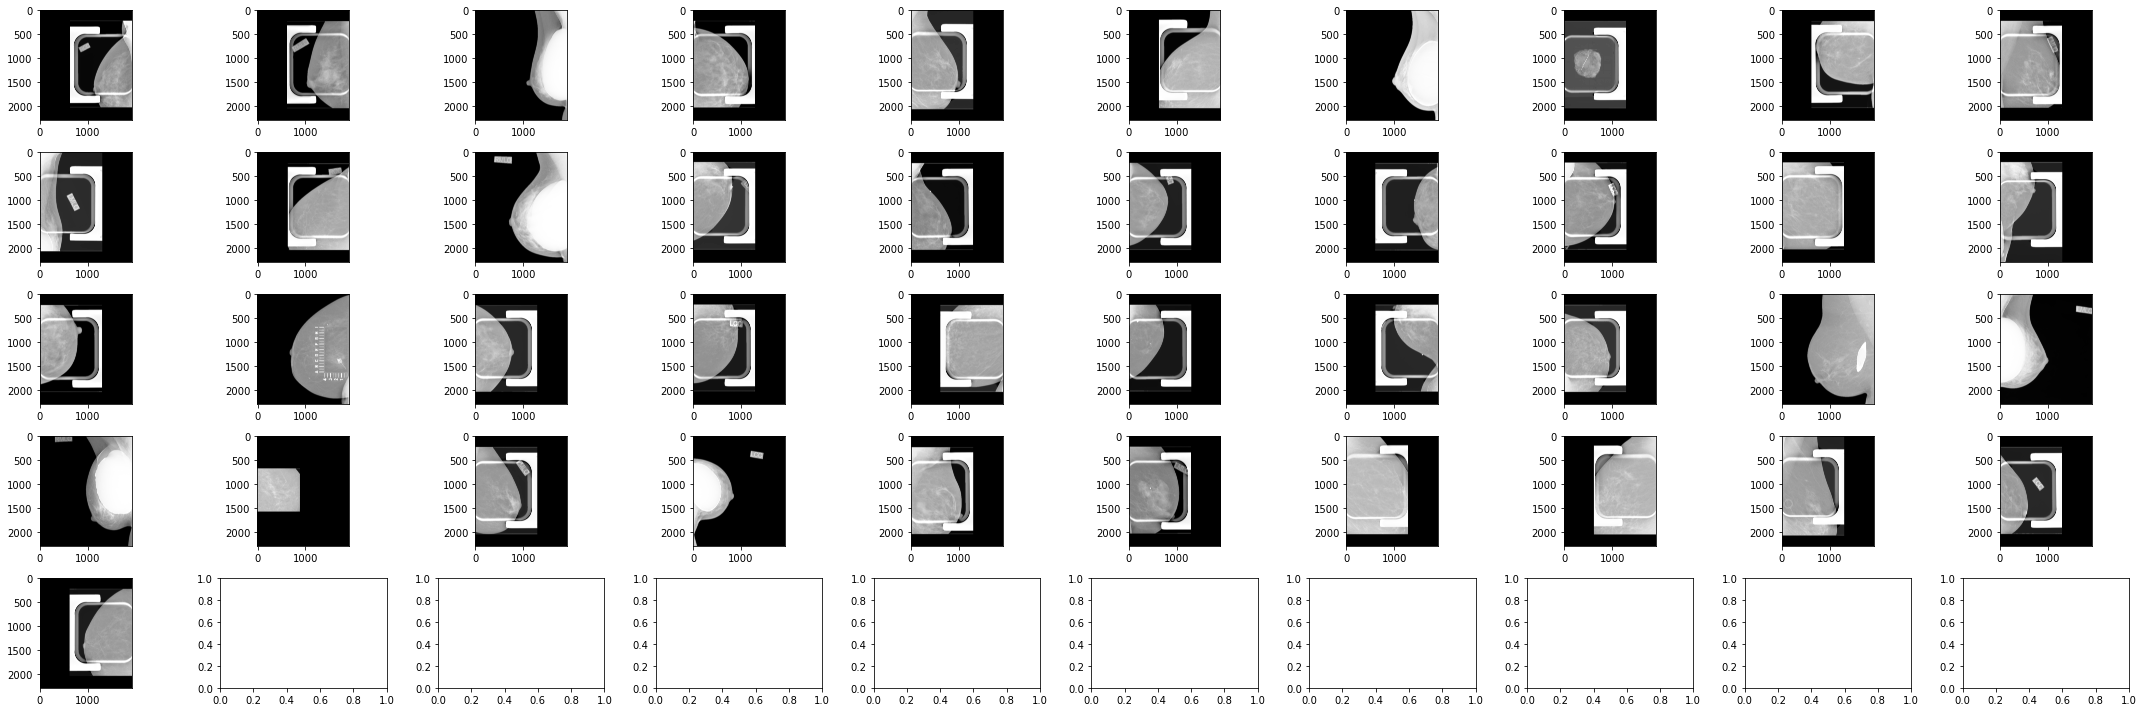

In [13]:
O.DataHelper.view_grid(bad_images, ncols=10)